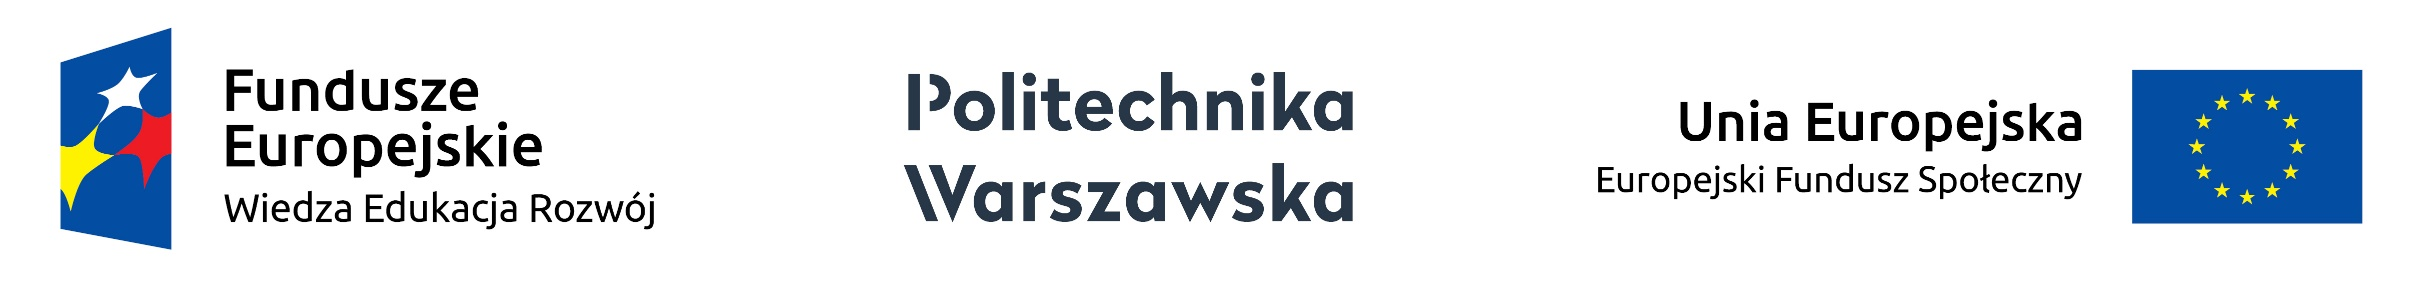

# Programming Language With Numerical Methods
<heads>
Joanna Kozuchowska, Msc
    
## Class 11. Working with files. String formatting

**Whenever you learn a new feature, you should try it out in interactive mode and make errors on purpose to see what goes wrong and what types of errors you run into.**

**Contents**<a id=contents></a>
1. [Reading and writing files](#read)<br>
    1.1 [Reading csv files](#csv)<br>
2. [String formatting](#str)<br>
   2.1. [General rules](#rules)<br>
   2.2. [% statement](#percent)<br>
   2.3. [`format` method](#format)<br>
   2.4. [f-string](#fstring)<br>
3. [Exercises](#exercises)
 
 
**Additional materials**
1. Working with files
- Methods of File objects, Python tutorial: https://docs.python.org/3/tutorial/inputoutput.html#methods-of-file-objects
- More on NumPy data loading methods: https://likegeeks.com/numpy-loadtxt-tutorial/
2. Text formatting:
    - f-string: https://www.python.org/dev/peps/pep-0536/, https://www.geeksforgeeks.org/formatted-string-literals-f-strings-python/, 
    - str.format: https://docs.python.org/3/library/string.html#string-formatting
    - string formatting: https://docs.python.org/2/library/stdtypes.html#string-formatting
    - `=` operator in Python 3.8: https://www.geeksforgeeks.org/new-operator-in-python3-8-f-string/

## Reading and writing files <a id=read></a>

#### Writing data to files
- `f.write()`
- `f.writelines()`

In [28]:
with open("new1.txt", "a") as f:
    f.write("hello\n")
    f.writelines([str(5.03)]*5)

#### Reading data from files
- `f.read()` 
- `f.readline()`
- `f.readlines()`

In [19]:
file = open("new.txt")

# whole file at once
whole = file.read(10)
print(whole)
# windows: \r\n Mac: \n
line = file.readline()
print(repr(line))
line = file.readline()
line = line.strip()
print(repr(line))

eggs
spam

'spam spam eggs\n'
'fadlg'


In [20]:
file = open("new.txt")
line = file.readline()
while line != '':
    line= file.readline()
    print(line)

spam

spam spam eggs

fadlg

skghag

fakfgnad




In [21]:
file = open("new.txt")
lines = file.readlines()
print(lines)

['eggs\n', 'spam\n', 'spam spam eggs\n', 'fadlg\n', 'skghag\n', 'fakfgnad\n']


#### Reading file using a file iterator

In [30]:
with open("new.txt", "r") as f:
    for line in f:
        data = line.strip().split(",")
        print(data)

['name', 'lname', 'age']
['Paul', 'Smith', '23']
['Anna', 'Jones', '43']


In [22]:
file = open("new.txt")
for line in file:
    print(line)
file.close()

eggs

spam

spam spam eggs

fadlg

skghag

fakfgnad



### Reading csv files <a id=csv></a>
There are several methods to read the `csv` file (csv - comma-separated values), tabularic data delimited usually with a comma, or, less often with a semicolon.

In [14]:
data_to_save = ["name,lname,age", "Paul,Smith,23", "Anna,Jones,43"]

#### Using `np.genfromtxt`
The limitation of `genfromtxt` is that it would skip the data of different type - by default, every value read is treated as float, unless defined otherwise (with datatype parameter);

In [22]:
import numpy as np

data = np.genfromtxt("new_file.csv", delimiter=",", skip_header=1)
print(data)

[[nan nan 23.]
 [nan nan 43.]]


In [21]:
import numpy as np

# read every value as str
data = np.genfromtxt("new_file.csv", delimiter=",", dtype='str', skip_header=1, encoding='utf8')
print(data)

[['Paul' 'Smith' '23']
 ['Anna' 'Jones' '43']]


`genfromtxt` is also able to return each column separately for further processing, instead of keeping all the data in the array: just define the `unpack` parameter to `True`.

In [23]:
first_names, last_names, age = np.genfromtxt("new_file.csv", delimiter=",", unpack=True, skip_header=1, dtype='str',)
print(first_names)

['Paul' 'Anna']


In [20]:
# saving tabular data to a file
# providing the format: fmt, since we save mixed data
np.savetxt("new_file_np.csv", data, 
           fmt='%s %s %d', 
           delimiter=',',
           newline='\n',
            header='name,lname,age',
          comments='') 
# by default, numpy adds # to header, redefine comments to skip it; 
# also, by default line with # in the beginning is skipped while reading with genfromtxt

#### Using generic file-reading methods

In [10]:
# reading files
with open("new_file.csv", "r") as f:
    lines = f.readlines() # read the whole file into separate lines
    
# divide the lines into individual elements, get rid of the newline character at the end of the line
lines = [line.strip().split(",") for line in lines]
print(lines)
# can be casted to an np.array if needed

[['name', 'lname', 'age'], ['Paul', 'Smith', '23'], ['Anna', 'Jones', '43']]


In [27]:
# writing files
data = [['name', 'lname', 'age'], ['Paul', 'Smith', '23'], ['Anna', 'Jones', '43']]
# writelines does not include a newline character, so first, we need to add it to data; 
# also, join the values with comma
data_to_save = [",".join(line) + "\n" for line in data]

with open("new_file_standard.csv", "w") as f:
    lines = f.writelines(data_to_save)  

#### Using `csv` module

In [11]:
import csv

with open("new_file.csv", "r") as f:
    csvr = csv.reader(f)
    for line in csvr:
        print(line)

['name', 'lname', 'age']
['Paul', 'Smith', '23']
['Anna', 'Jones', '43']


#### Using `pandas` module

Pandas reads csv data into its own data structure called `DataFrame`. If we do not want to use`DataFrame`, we can cast it to list or some other structure.

In [29]:
import pandas as pd

data = pd.read_csv("new_file.csv")
names = list(data["name"])
print(names)

['Paul', 'Anna']


In [40]:
# write data
# first, the data needs to be transformed to DataFrame, as saving to csv is a method of a DataFrame object
data = [['name', 'lname', 'age'], ['Paul', 'Smith', '23'], ['Anna', 'Jones', '43']]
# parameter columns define names of columns
data_to_pd = pd.DataFrame(data[1:], columns=data[0]) 

data_to_pd.to_csv("new_file_pd.csv", 
                  index=False, #skip index of rows
                 )

In [41]:
# check how the DataFrame looks
data_to_pd.head()

,name,lname,age
0,Paul,Smith,23
1,Anna,Jones,43


## String formatting <a id=str></a>

### % operator <a id=percent></a>
Formatting with `%` is the oldest available method. It allows to do simple positional formatting. As in example below, a string, which includes a format specifier (`%s` and `%.4f`), is followed with a `%` operator and variable names given as a tuple (because it takes only one argument). The first variable is put in place of the first formatter and so on.

Instead of positional matching, variables can be matched using aliases, see more details here: https://docs.python.org/3/library/stdtypes.html#old-string-formatting

*% operator is not recommended.*

In [1]:
variable = 0.1
name = "Alice"
print("Name of person: %s, fraction: %.4f" %(name, variable))
print("Hi, my name is %s!" % name)

Name of person: Alice, fraction: 0.1000
Hi, my name is Alice!


### `format` method <a id=format></a>

Python 3 introduced a new approach to string formatting - a `format` method. Formatting is done by calling the `format` method on a string object.

Again, the arguments can be taken positionally, you can refer to them using indices or aliases or `**` to unpack dictionaries

Some more information on formatting: https://realpython.com/python-formatted-output/

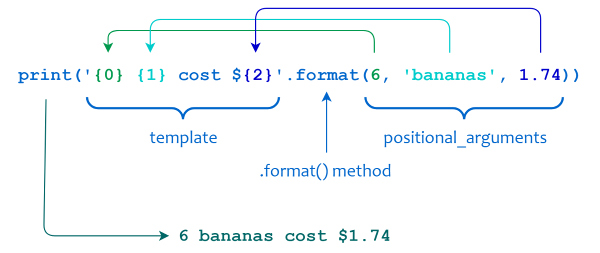
(Source: https://realpython.com/python-formatted-output/)

In [3]:
variable = 0.1
name = "Alice"
print("Name of person: {}, fraction: {}".format(name, variable))

Name of person: Alice, fraction: 0.1


In [29]:
name, price = "Alice", 32.52
print("Hello, {}! You need to pay {} dollars!".format(name, price))

Hello, Alice! You need to pay 32.52 dollars!


In [2]:
print("Name of person: {:^8s}, fraction: {:.4f}".format(name, variable)) # some formatting specifier

Name of person: Alice, fraction: 0.1
Name of person:  Alice  , fraction: 0.1000


In [4]:
# switch elements
print("Name of person: {1}, fraction: {0}".format(name, variable))

Name of person: 0.1, fraction: Alice


In [31]:
# using substitutions for variable names
print("Name of person: {name:.20s}, fraction: {var:16.2f}".format(name=name, var=0.87))

Name of person: Alice, fraction:             0.87


In [32]:
countries = {'country': 'Poland', 'capital': 'Warsaw'}
print("The capital of {country} is {capital}.".format(**countries))

The capital of Poland is Warsaw.


### f-string <a id=fstring></a>
Starting with Python 3.6, a new method of string formatting is available called **formatted string literals** or **f-strings**. This approach allows to use embedded Python expressions inside string constants.

**To use the f-string, prefix the string with letter f.** The syntax inside a string is similar to `format` method, but f-strings are faster than the previously mentioned methods.

Apart from including variables, we can do some arithmetic or call functions inside the expression (see examples below) - everything that is enclosed in braces is treated as an expression.

Limitations of f-strings:
- the braces can't be empty (`f"aa{}bb"` won't work),
- f-strings cannot contain a backslash (`\`) characters - which is sometimes used to escape some characters or to introduce a newline character, or tab space; a workaround uses a variable which includes this character.

More information on f-strings: https://docs.python.org/3/reference/lexical_analysis.html#f-strings

In [ ]:
variable = 0.1
name = "Alice"

In [33]:
print(f"Name of person: {name}, {variable}")

Name of person: Alice, 0.1


In [45]:
print(f"Name of person: {name:^10s}, fraction: {variable:08.4f}")

Name of person:   Alice   , fraction: 000.1000


In [24]:
import math as m

print(f"2 + 2 = {2+2}")
print(f"sin(pi) = {m.sin(m.pi/2)}")
name = "ANNA SMITH"
print(f"{name.title()}")

2 + 2 = 4
sin(pi) = 1.0
Anna Smith


In [37]:
# careful with quotation marks
countries = {'country': 'Poland', 'capital': 'Warsaw'}
print(f"The capital of {countries['country']} is {countries['capital']}.")
# print(f"Capital of {countries["country"]} is {countries["capital"]}.") #won't work
# print(f"Capital of {countries[\"country\"]} is {countries[\"capital\"]}.") #won't work

The capital of Poland is Warsaw.


In [28]:
# workaround fro backslash limitations:
nl = '\n'
print(f'line_1{nl}line_2')

line_1
line_2


### Named f-string
From version 3.8, an adjustment to f-string is available -- a named f-string. The idea is to include the name of the variable along its value. New syntax requires an additional `=` operator in the string constant, but the rest remains the same.

In [18]:
variable = 0.1
name = "Alice"
print(f"Name of person: {name=}, {variable=}")
print(f"Name of person: {name=:>10s}, {variable=:4.2f}")

Name of person: name='Alice', variable=0.1
Name of person: name=     Alice, variable=0.10


### Format specifiers <a id=rules></a>
Format specifiers define the result of the formatting. They let control the fill character, alignment, width and precision of the data that is inserted in the replacement field.

```:[[<fill>]<align>][<sign>][#][0][<width>][<group>][.<prec>][<type>] ```

The components of the format specifier are:

- `:` - separates the format specifier from the rest of the replacement field, e.g. the name of the variable, alias or index,
- `fill` - defines how to pad values that do not take the entire `width`, ignored, if the output occupied the entire field width,
- `align` - defines how to justify values that do not take the entire `width`,
- `sign` - specifies if the sign of the number is included for numeric values,
- `#` - defines an alternate output form depending on the presentation types,
- `0` - values are padded on the left with `0` instead of another ASCII characters,
- `width` - defines the **minimum** width of the output field,
- `group` - defines a grouping character for numeric output (like a thousands separator),
- `.prec` - specifies: (1) the number of decimal digits in a floating point number, (2) the maximum output width for string types,
- `type` - defines the presentation type (type of conversion performed on the argument);


| component | value | description |
| :-: | :-: | :- |
|align | < | left-aligned (default for strings)
|align | > | right-aligned
|align | \^ | centered
|align | = | only for numeric values when sign is included 
|fill |  | any character can be used to fill the extra space (except for curly braces)
|sign | + | the displayed value is always displayed with a leading sign (both positive and negative values)
|width| `<number>` | the minimum width of the output field, defined with a number
|group |, | separate groups of numbers with a comma (each group of three digits is separated)
|group | \_ | separate groups of numbers with an underscore
|.prec |`<number>`| number of digits after decimal point for floating point representation 

Presentation type:
- `s` - string
- `d` - integer number
- `b` - binary integer
- `o` - octal integer
- `x` `X` - hexadecimal integer
- Floating point
    - `e` - Exponent notation. Prints the number in scientific notation using the letter 'e' to indicate the exponent.
    - `E` - Exponent notation. Same as `e` except it converts the letter to uppercase.
    - `f` or `F` - Fixed point. Displays the number as a fixed-point number.
    - `g` - General format. This prints the number as a fixed-point number, unless the number is too large, in which case it switches to `e` exponent notation.
    - `G` - General format. Same as `g` except switches to `E`, if the number gets to large.
    - `n` - Number. This is the same as `g`, except that it uses the current locale setting to insert the appropriate number separator characters.
    - `%` - Percentage. Multiplies the number by 100 and displays in fixed (`f`) format, followed by a percent sign.
    - ` ` (None) - similar to `g`, except that it prints at least one digit after the decimal point.

Conventions
- %6.2f - use 6 characters to write a float number, 2 characters after a decimal point, the decimal separator is included in the overall number of characters
- %20s - use 20 characters to write a string; surplus of the characters is filled with spaces: in %-formatting - on the left (before string), in format - at the end of a string,
- %8s - use 20 characters to write a string;

In [44]:
# example of formatting with sign
'{0:+8d}'.format(123)

'    +123'

In [45]:
'{0:=+8d}'.format(123)

'+    123'

In [50]:
'{0:05d}'.format(123)

'00123'

In [49]:
'{0:08.1f}'.format(12.3)

'000012.3'

## Exercises<a id="exercises"></a>

[To Table of Contents](#contents)

**Exercise 1**

1. Open a blank file and write a few lines about yourself or about your day. Save the file. 

2. Write a program that reads the file and prints what you wrote three times. 
Use methods below:
 - reading the entire file at once
 - reading the file while looping the file object
 - reading the lines of the file and process them outside the with block.

**Exercise 2**

1. Create two sets of coordinates, `x` and `y`. 
2. Save them to a `csv` file. 
3. Read the file, convert lists to arrays and plot the results.

**Exercise 3**

Define  a polynomial $P(x)$. Compute its values for 100 points in the defined interval. Store the results ($x$ and $P(x)$) in a text file with two columns, separated with a tab. Each pair should be in a separate line.

**Exercise 4**

Read data in the file new_york.csv. Skip the header. Change missing values (-99) to NaN. Compute an average of temperature and precipitation over the years.

**Exercise 5**

Using the file sonnets.txt, save each sonnet to a separate file. Luckily for you, each sonnet has 14 lines :)

**Exercise 6**

Count the words in a sonnets.txt.

**Exercise 7**

Read the file sonnets.txt. Count the number of appearance of each word in a file. You can skip punctuation (`word` and `word!` and `WORD` is the same word). Save results to a text file. 

**Exercise 8**

Using one of the formatting methods, print the table as in example below and save it to a file oscars.txt

In [ ]:
year = [1959, 1997. 2003, 1961]
movie = ["Ben Hur", "Titanic", "LOTR: The Return of the King", "West Side Story"]
oscars = [11, 11, 11, 10]

**Exercise 9**

Read a file pi_million.txt including million digits of a pi number. Check if those digits contain your date of birth sequence given as `yymmdd`.